In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
#specify the drive/.../filename to read

Mounted at /content/drive/


In [6]:
#Sania
data_df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip (Unzipped Files)/train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#dropping all the columns that aren't categorical
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [8]:
data = clean_df

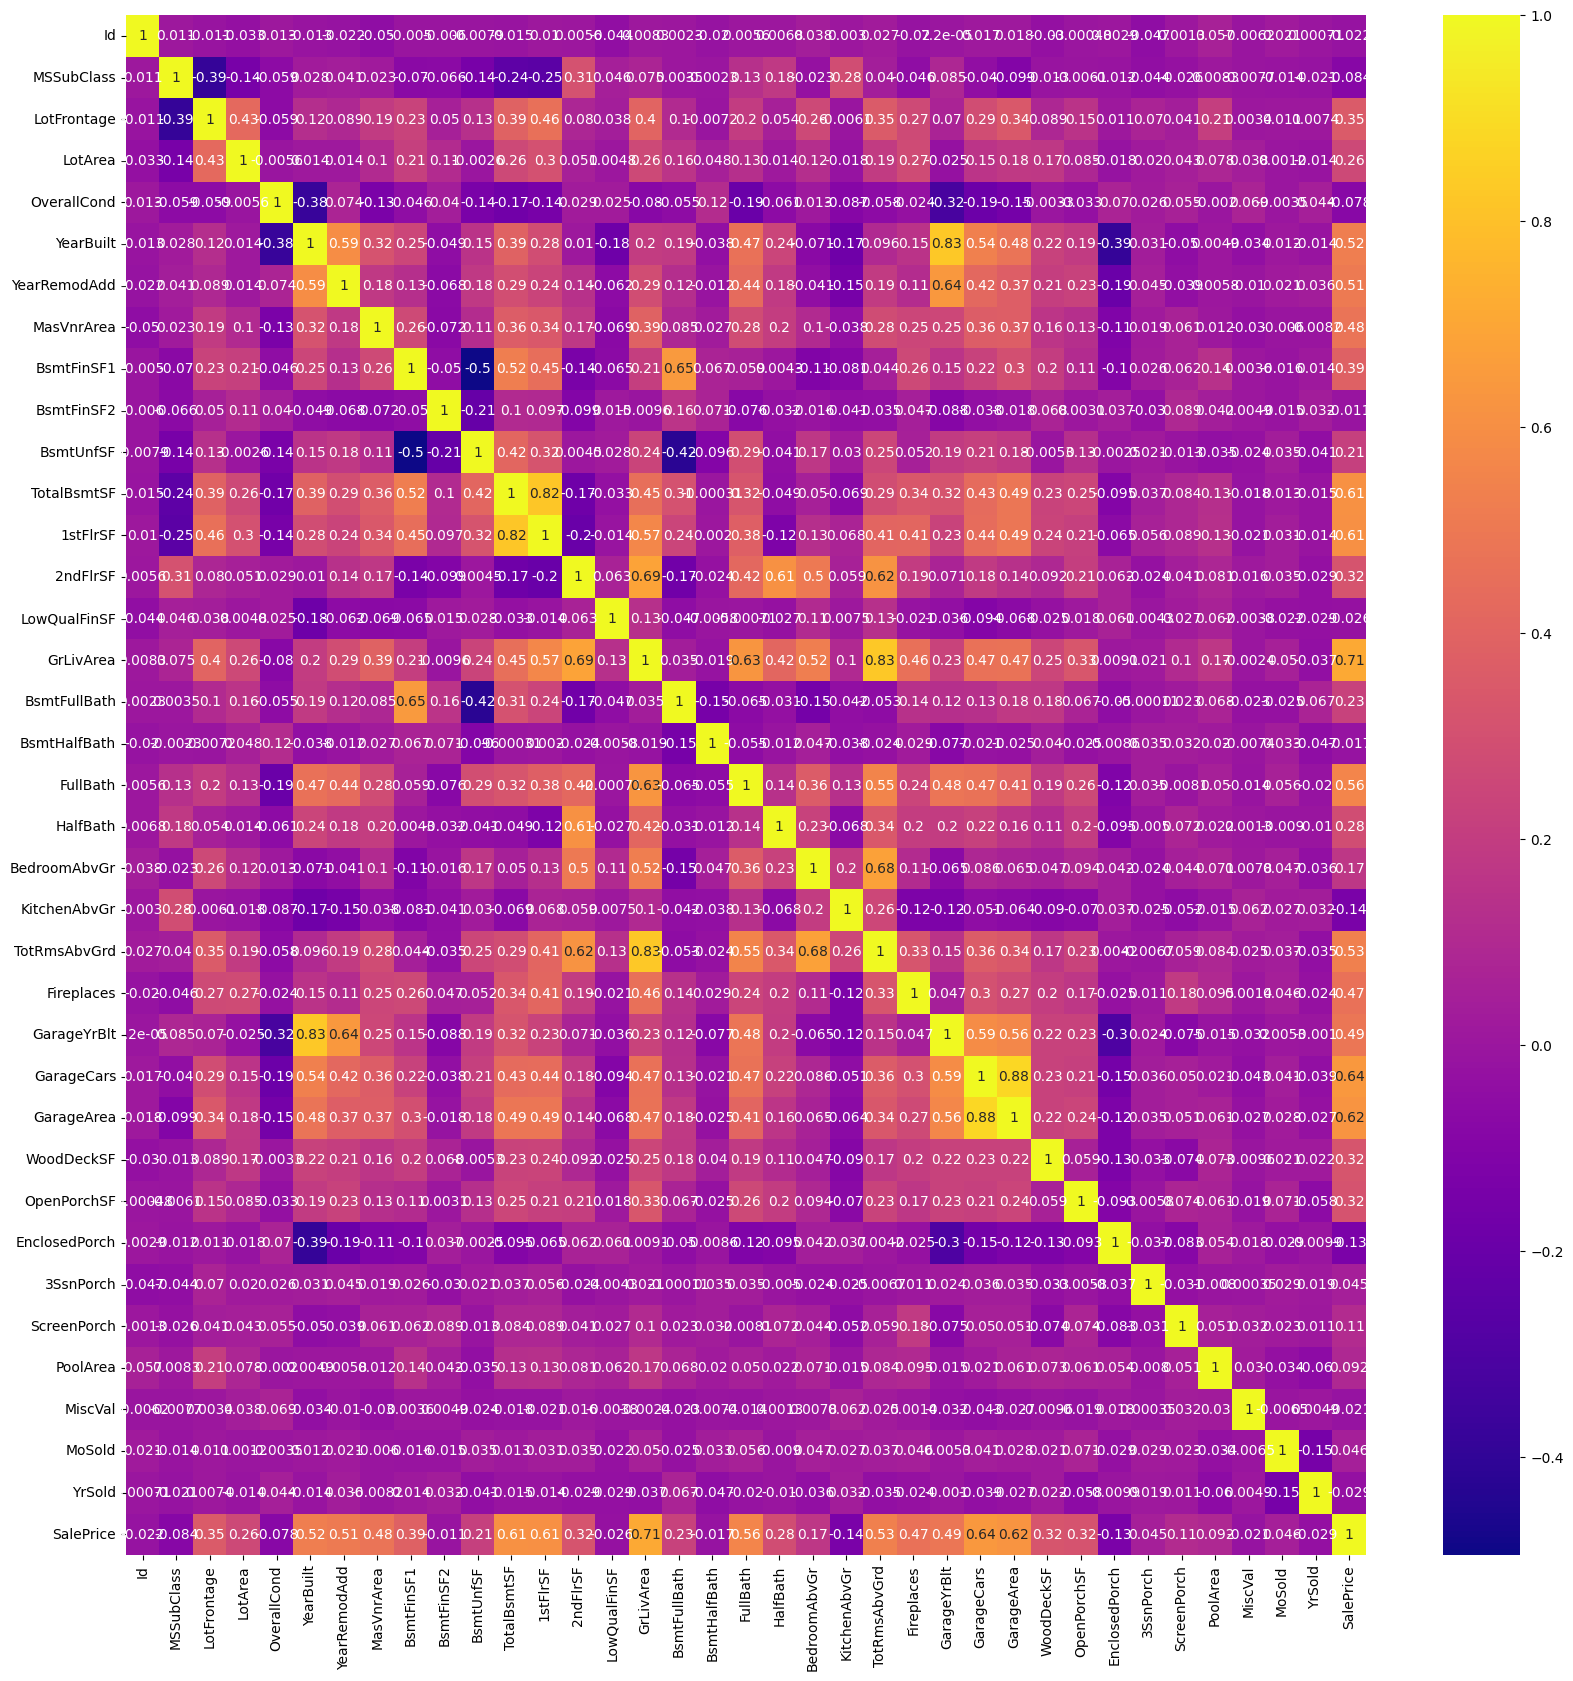

In [9]:
#S
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="plasma")
plt.show()

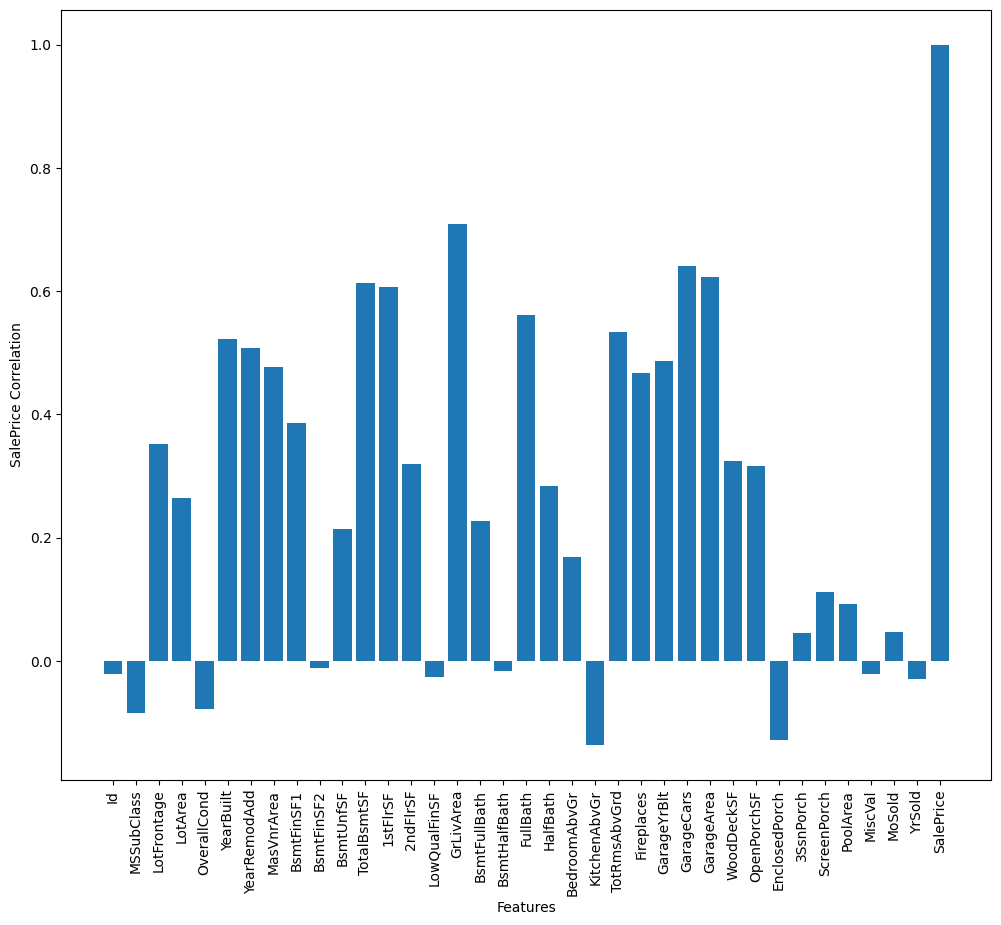

In [10]:
cor = data.corr()
column_to_plot = 'SalePrice'
#find the top 5 correlation
#not as correlated with each other
plt.figure(figsize=(12, 10))
plt.bar(range(len(cor)), cor[column_to_plot])
plt.xlabel('Features')
plt.ylabel('SalePrice Correlation')
plt.xticks(range(len(cor)), cor.columns, rotation=90)
plt.show()
#we are finding the correlation of the mdoel and outputting it as a graph, from here we handpick our ideal features and run it in the model

#Running the Regressor

In [11]:
#one hot vectorizing the data that isn't one hot vectorized
cols_to_encode = ['MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating']
ohe = pd.get_dummies(data_df[cols_to_encode])
data_df = pd.concat([data_df, ohe], axis=1)

In [12]:
#dropping all the columns we one hot vectorized
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
data = clean_df.dropna()

In [31]:
#dropped everything below 0.2 covariance
X=data.drop(columns = ["SalePrice", "Id", "MSSubClass", "OverallCond", "BsmtFinSF2","LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr", "KitchenAbvGr", "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea", "MiscVal", "MoSold", "YrSold" ], axis=1) #axis=1 means along the column, axis=0 means along the row
y=data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 32511.39263077987


In [27]:
#dropped everything below 0.4 covariance
X=data.drop(columns = ["SalePrice", "Id", "MSSubClass", "OverallCond", "BsmtFinSF2","LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr", "KitchenAbvGr", "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea", "MiscVal", "MoSold", "YrSold", "LotFrontage", "LotArea", "BsmtFinSF2", "2ndFlrSF", "BsmtFullBath", "WoodDeckSF", "OpenPorchSF"], axis=1) #axis=1 means along the column, axis=0 means along the row
y=data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 34161.670573874275


In [28]:
#dropped everything below 0.6 covariance
X=data.drop(columns = ["SalePrice", "Id", "MSSubClass", "OverallCond", "BsmtFinSF2","LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr", "KitchenAbvGr", "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea", "MiscVal", "MoSold", "YrSold", "LotFrontage", "LotArea", "BsmtFinSF2", "2ndFlrSF", "BsmtFullBath", "WoodDeckSF", "OpenPorchSF", "YearBuilt", "YearRemodAdd", "MasVnrArea", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt"], axis=1) #axis=1 means along the column, axis=0 means along the row
y=data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 36188.01087428802
